# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA- Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

1. Data Import: Import the dataset into a statistical software tool such as Python or R.
2. Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
3. Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
4. Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
5. Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
6. Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
7. Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
8. Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## 1. Data Import
Import the dataset into a statistical software tool such as Python or R.

In [53]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore") 

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np

In [2]:
# load data into data frame
data = pd.read_csv('Wholesale_Data.csv')
# view first 5 rows of dataframe
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 2. Data Cleaning
Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious error

In [3]:
# check for nulls, no nulls found, all data types are integers, no need to convert dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
#  check counts of each columns 

# make list of columns in data
col_list = data.columns.tolist()
for col in col_list:
    print('\n',data[col].value_counts())


 Channel
1    298
2    142
Name: count, dtype: int64

 Region
3    316
1     77
2     47
Name: count, dtype: int64

 Fresh
9670     2
3        2
18044    2
8040     2
514      2
        ..
18827    1
10405    1
37036    1
30379    1
2787     1
Name: count, Length: 433, dtype: int64

 Milk
3045     2
1610     2
5139     2
2428     2
3587     2
        ..
1596     1
7152     1
13252    1
4280     1
1698     1
Name: count, Length: 421, dtype: int64

 Grocery
1664    2
2062    2
683     2
3600    2
6536    2
       ..
7305    1
3343    1
5034    1
8282    1
2510    1
Name: count, Length: 430, dtype: int64

 Frozen
2540    2
425     2
1285    2
4324    2
1619    2
       ..
2995    1
321     1
2279    1
825     1
65      1
Name: count, Length: 426, dtype: int64

 Detergents_Paper
118    2
955    2
256    2
69     2
918    2
      ..
516    1
399    1
51     1
960    1
477    1
Name: count, Length: 417, dtype: int64

 Delicassen
3       4
834     4
548     3
610     3
395     3
       ..
31

## 3. Data Description

Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [5]:
data.describe()

# at first glance possible outliers in Grocery, Frozen, Detergents_Paper, Delicassen

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 4. Data Visualization

Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

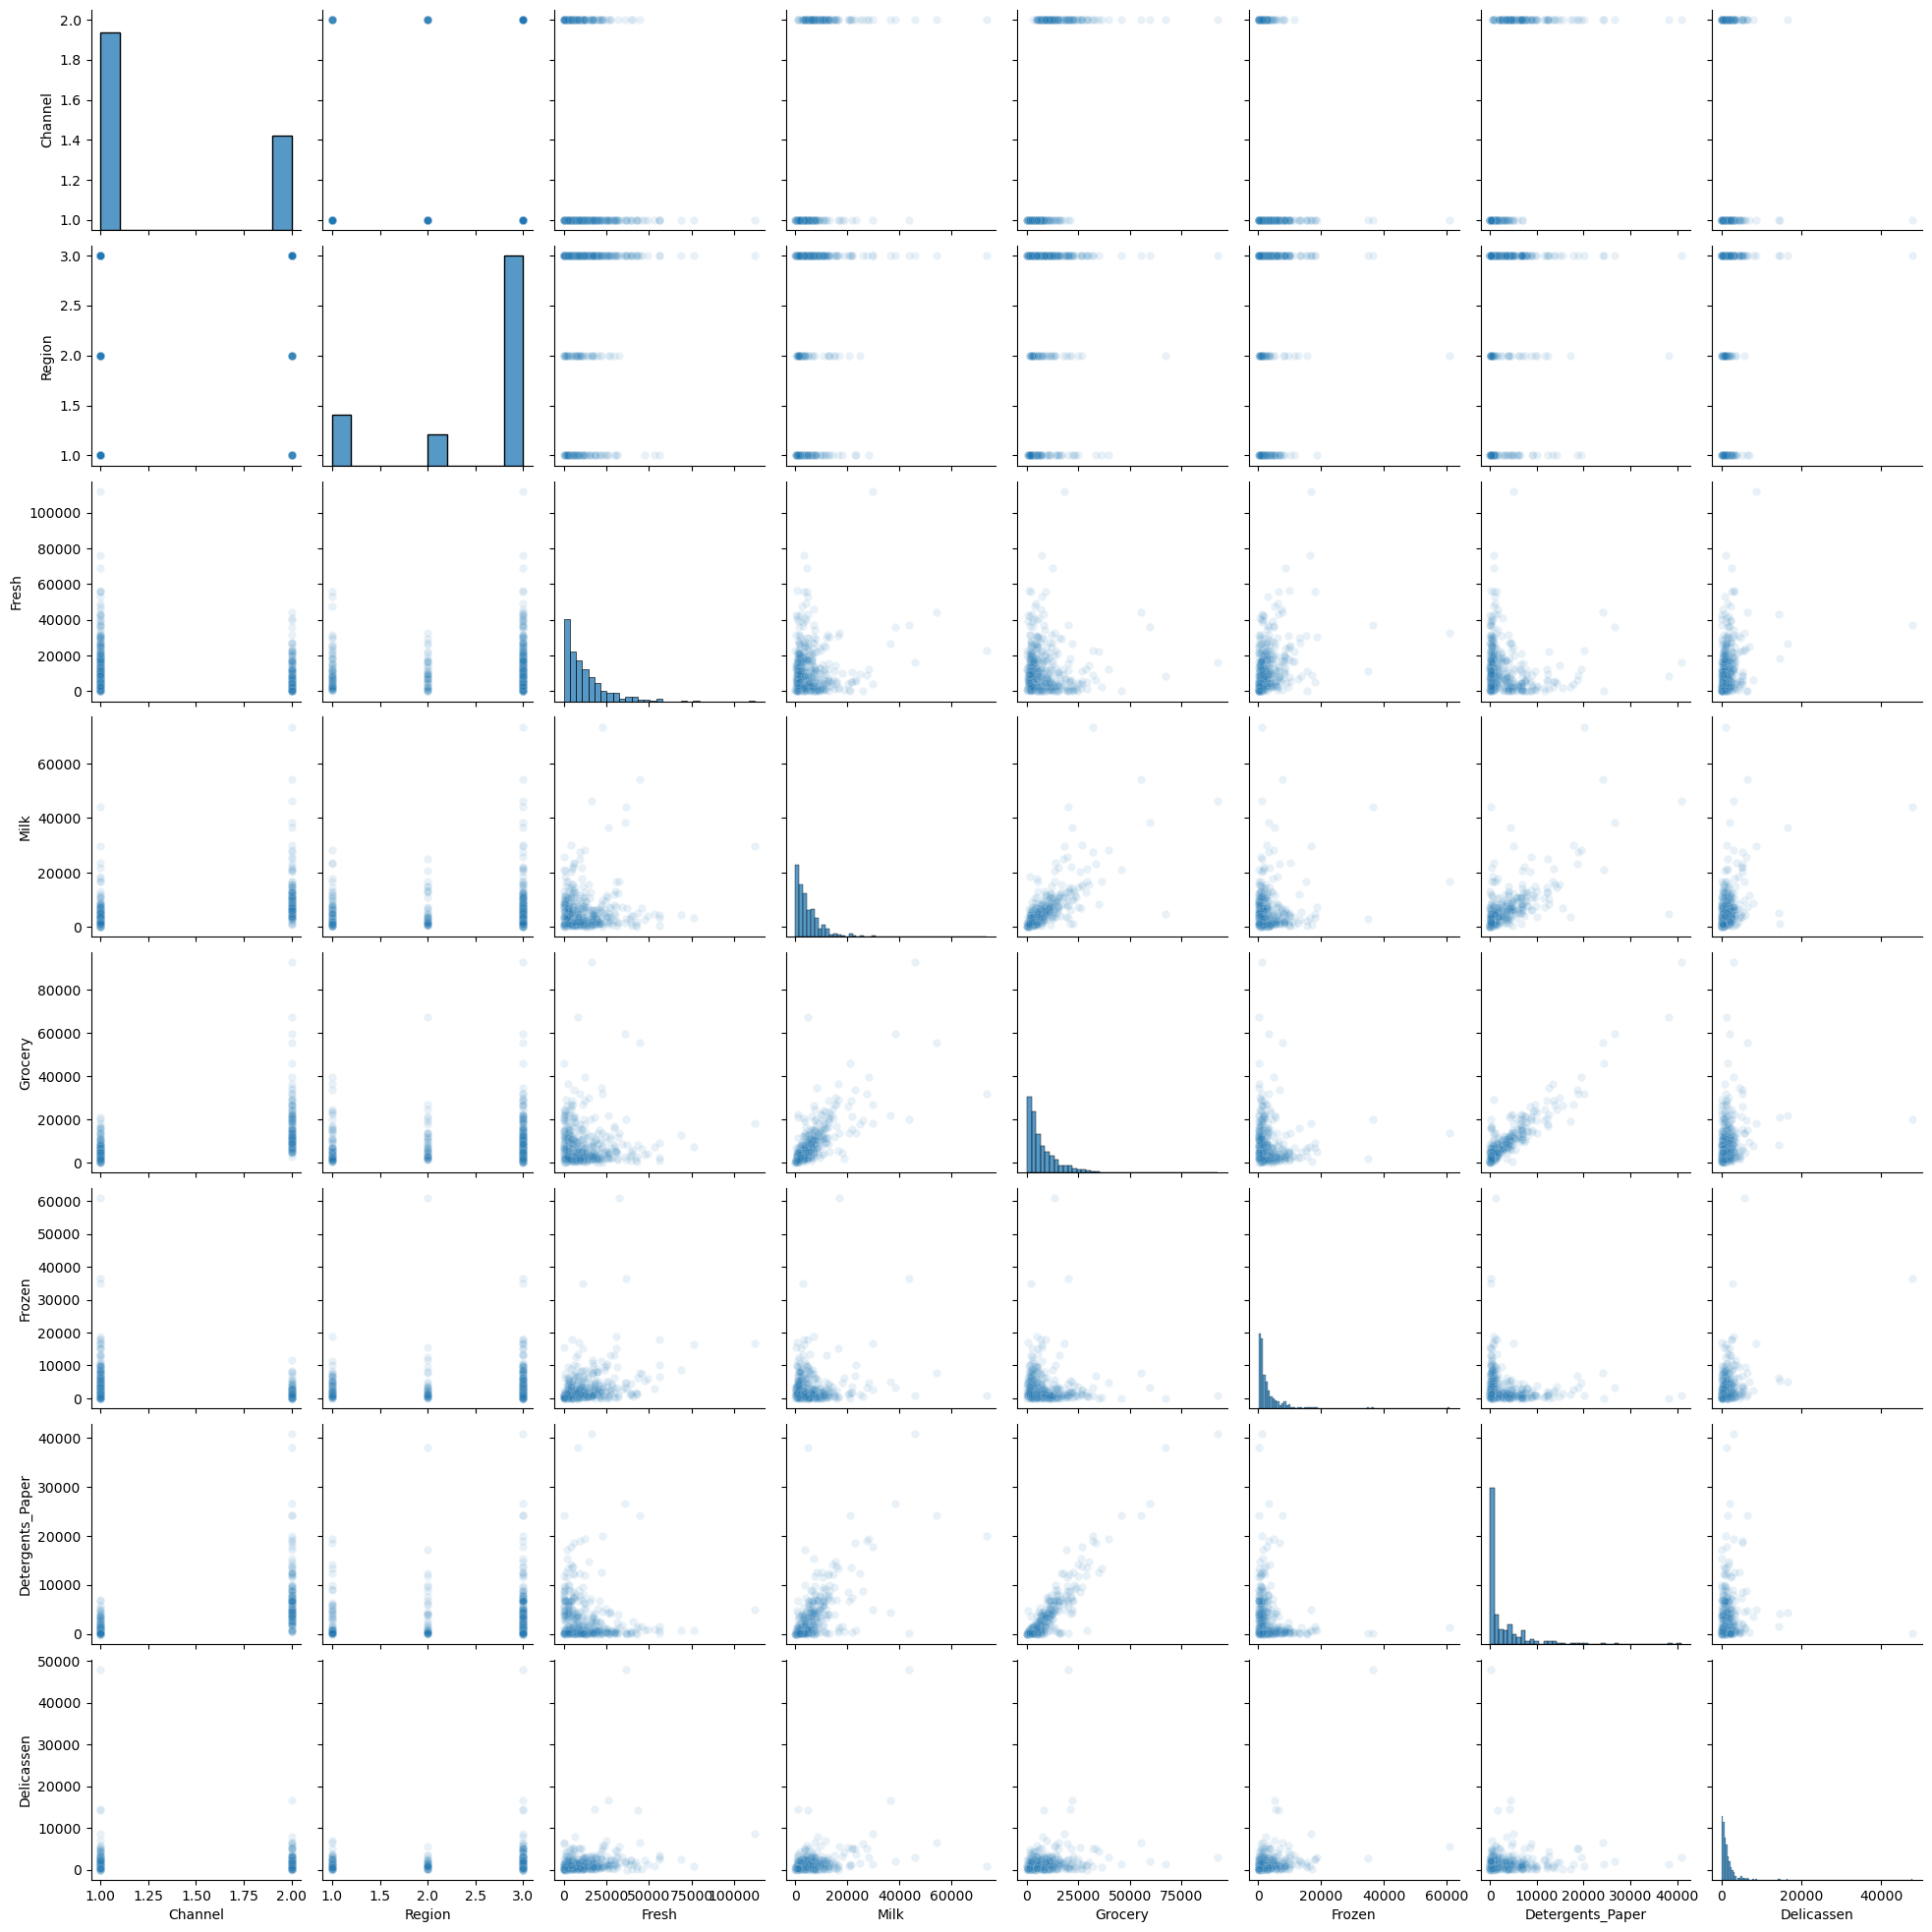

In [6]:
# vizualise all features - they all appear right skewed
sns.pairplot(data, kind='scatter', plot_kws={'alpha':0.1})

Pairplot findings (visually)
* all distributiuons appear right skewed - logarithmic or exponential
* strong linear relationship between Grocery and Detergents_paper, Grocery and Milk

In [7]:
col_list

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

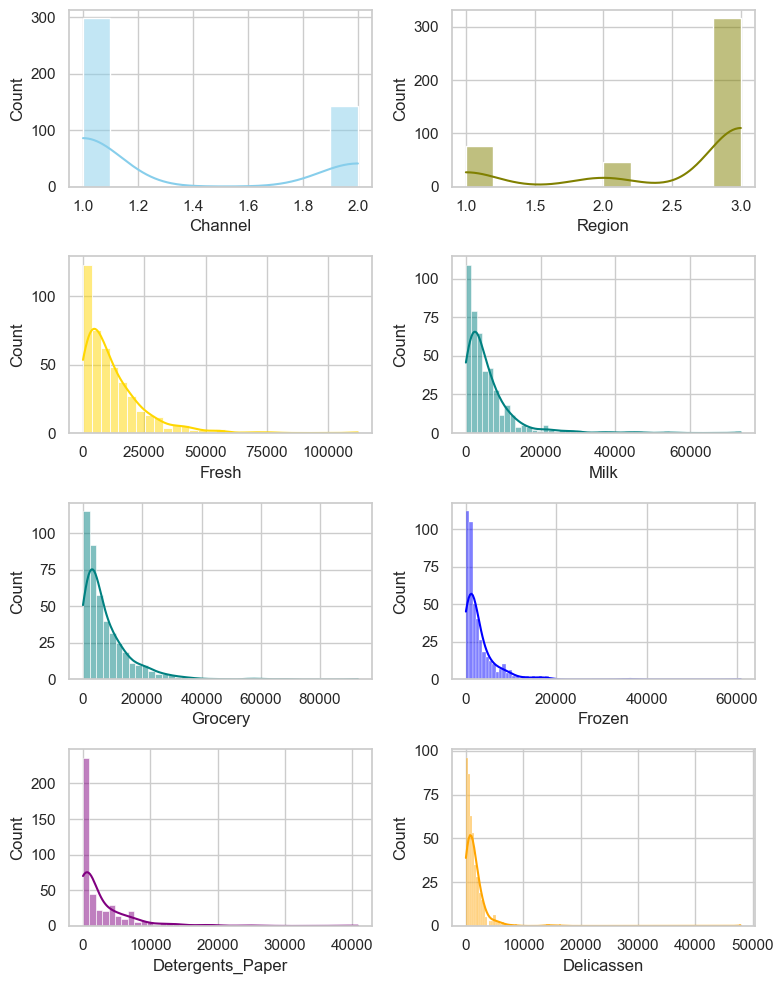

In [8]:
# distributions of each feature 

sns.set(style="whitegrid")
fig,axs = plt.subplots(4,2, figsize = (8,10))
sns.histplot(data=data, x="Channel", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data, x="Region", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data, x="Fresh", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data, x="Milk", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data, x="Grocery", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=data, x="Frozen", kde=True, color="blue", ax=axs[2, 1])
sns.histplot(data=data, x="Detergents_Paper", kde=True, color="purple", ax=axs[3,0])
sns.histplot(data=data, x="Delicassen", kde=True, color="orange", ax=axs[3,1])

fig.tight_layout()

<AxesSubplot: xlabel='Fresh', ylabel='Milk'>

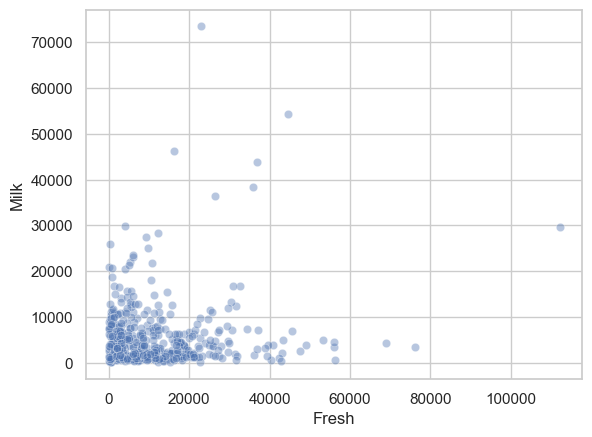

In [9]:
# visualise two Milk and Fresh
sns.scatterplot(data=data, x='Fresh', y='Milk', alpha=0.4)

## 5. Outlier Detection: 
Check for any outliers in the dataset and determine whether they are valid or erroneous data points.


(-5000.0, 120000.0)

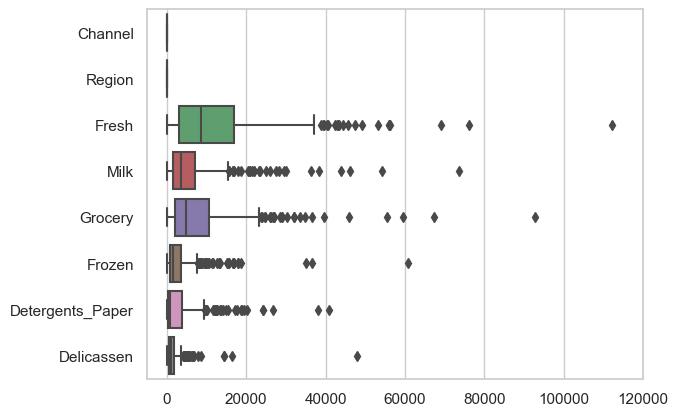

In [10]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='h')
ax.set_xlim(-5000,120000) 
# ax.set_xticks(range(1,32))

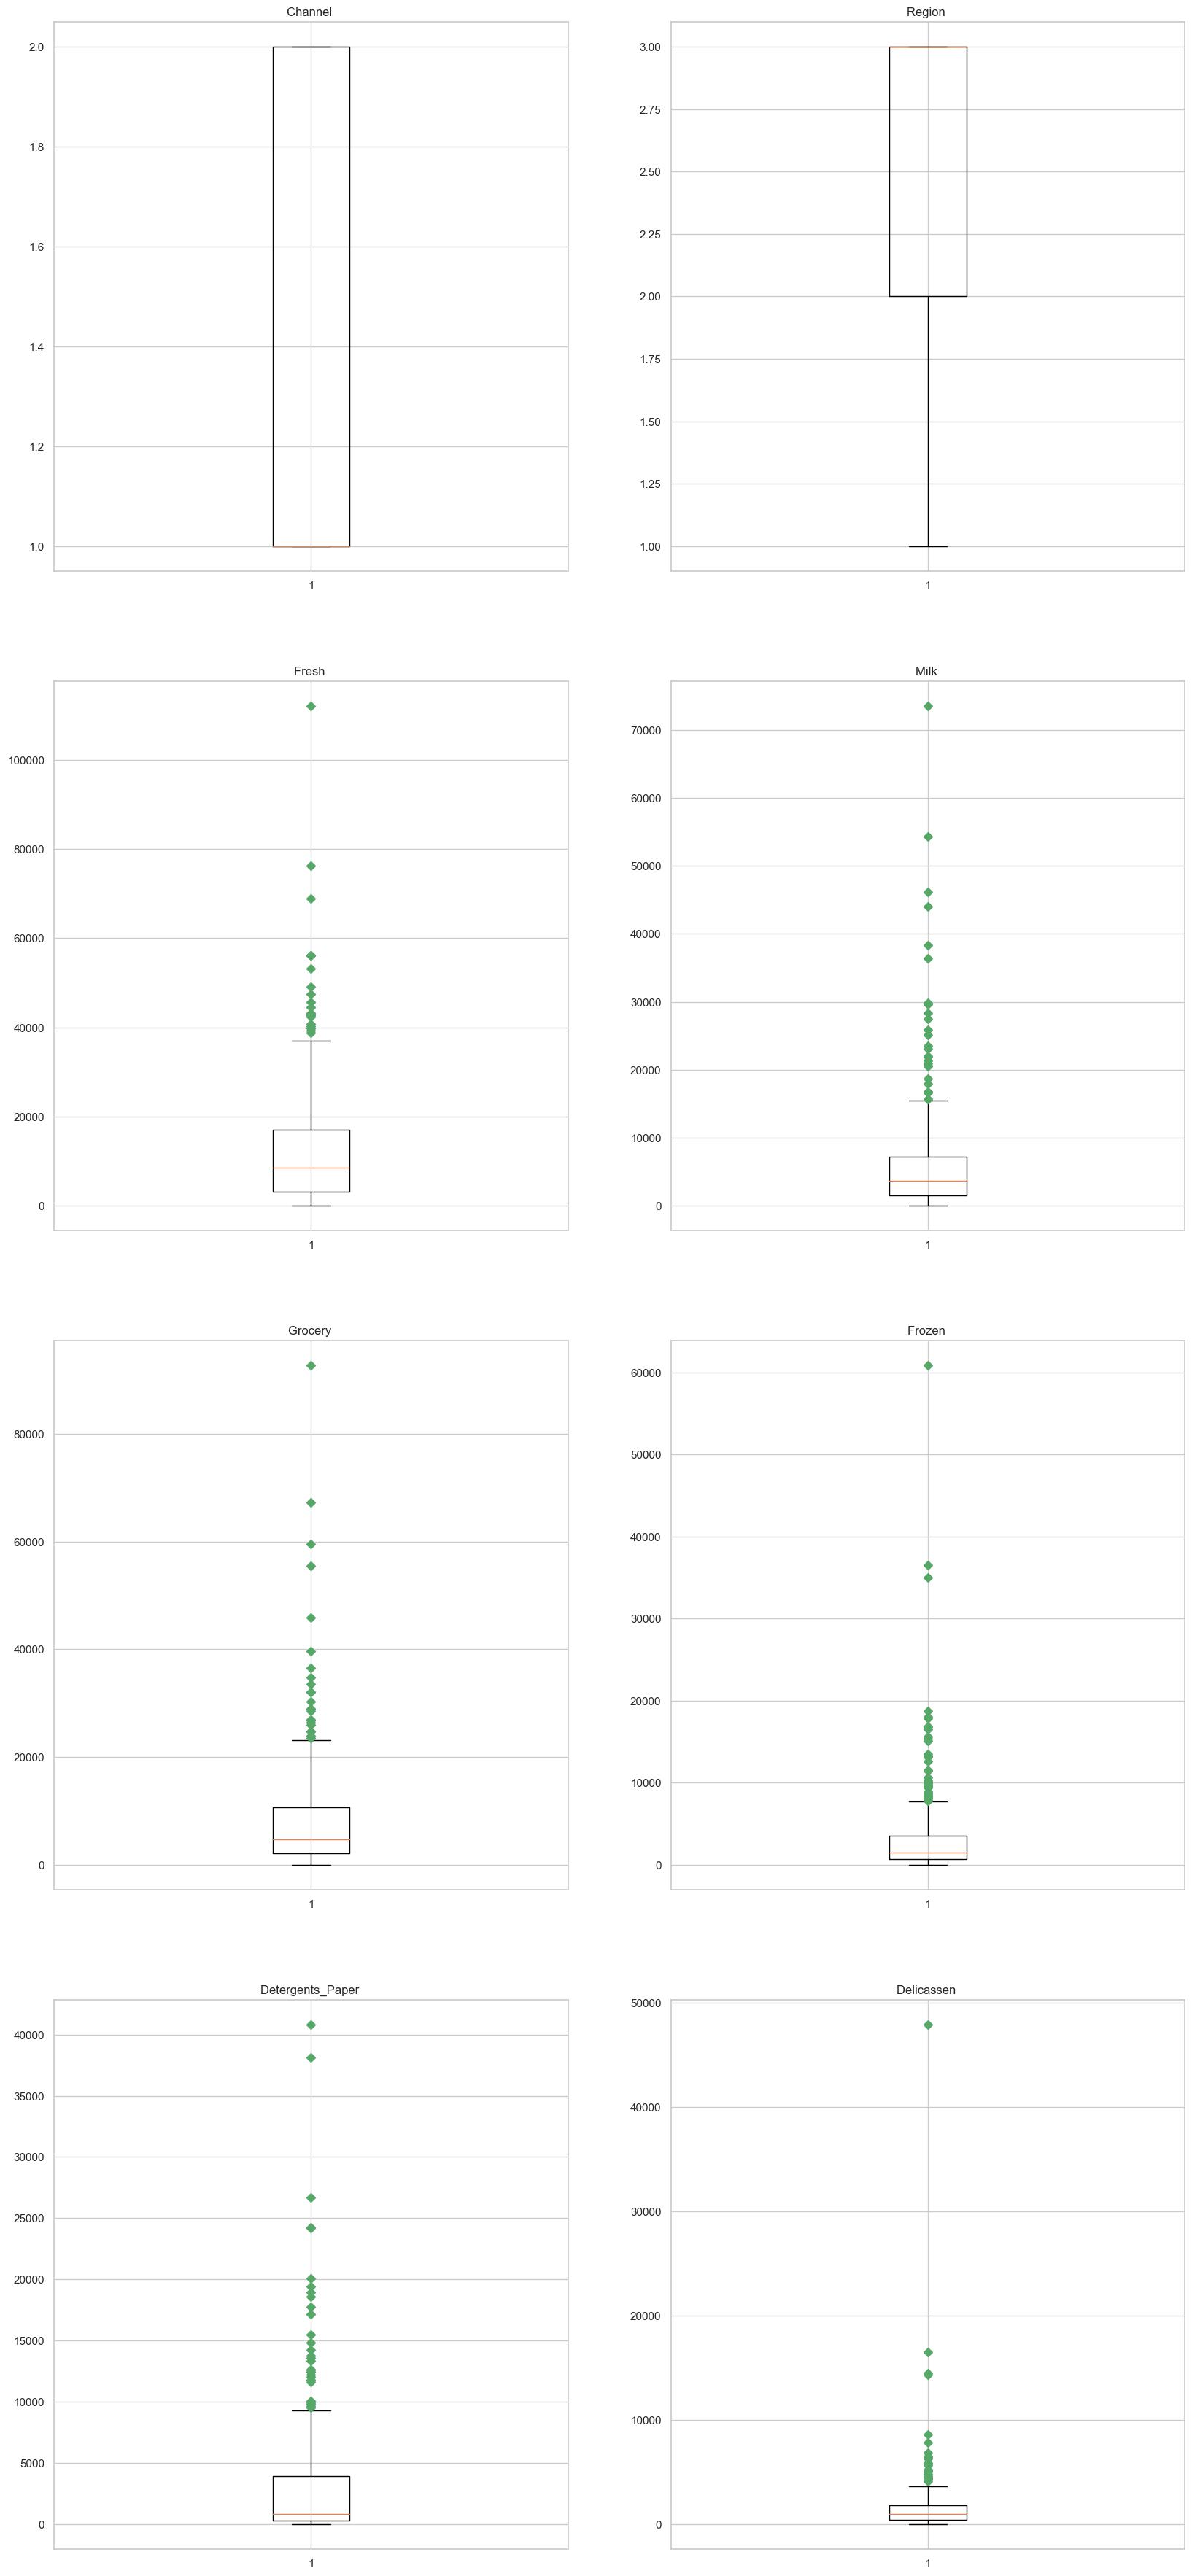

In [11]:
# Since the variables  all have different scales, plot each feature individually (alternative visual)
fig, axs = plt.subplots(4,2,figsize=(20,45))
for row in range(4): # each subplot row
    for col in range(2): # each subplot column
        feature_name = col_list[row*2+col]
        axs[row,col].boxplot(data[feature_name], 0, 'gD')
        axs[row,col].set_title(f"{feature_name} ")
plt.show()

In [12]:
# how many records are outliers in each features? 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_count = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame(outlier_count, columns = ['outlier_count']).reset_index()
outliers = outliers.rename(columns={'index':'feature'})
outliers['outlier_percent'] = round(outliers['outlier_count']/len(data), 3)

In [13]:
outliers.sort_values(by='outlier_percent', ascending=False)

,feature,outlier_count,outlier_percent
5,Frozen,43,0.098
6,Detergents_Paper,30,0.068
3,Milk,28,0.064
7,Delicassen,27,0.061
4,Grocery,24,0.055
2,Fresh,20,0.045
0,Channel,0,0.000
1,Region,0,0.000


In [14]:
outliers['outlier_count'].sum()

172

In [15]:
outlier_rows = data[(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))].dropna(how='all').index

In [16]:
data.iloc[outlier_rows,:]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,2,3,6353,8808,7684,2405,3516,7844
4,2,3,22615,5410,7198,3915,1777,5185
17,1,3,5876,6157,2933,839,370,4478
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
...,...,...,...,...,...,...,...,...
427,1,3,31012,16687,5429,15082,439,1163
431,1,3,8533,5506,5160,13486,1377,1498
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346


Outlier findings:
* All features (aside from Region and Chanel) have between 4.5% and 10% outliers
* outliers do not appear to be errors so will not remove them from the data set

## 6. Correlation Analysis

Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

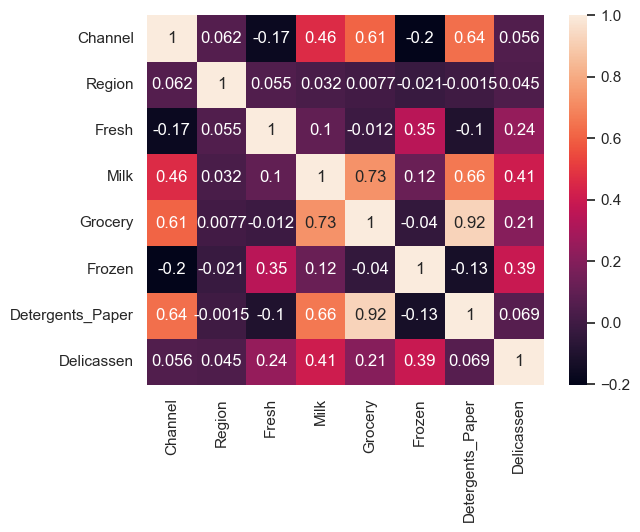

In [17]:
corr_matrix = data.corr()
# heatmap of all correlations with 'best' features 
sns.heatmap(corr_matrix, annot=True)
plt.show()

Findings:
Highly correlated variables:
* High correlation (0.7-0.9) - 
    * Grocery + Milk, - 0.73
    * Detergents_Paper + Grocery - 0.92
* Moderate correlation (0.5-0.7) - 
    * Grocery * Milk -0.73
    * Detergents_Paper + Milk - 0.66
    * Grocery + Chanel -  0.61
    * Detergents_Paper + Channel - 0.64
    
Weakest correlations (examples)
* Frozen + Grocery
* Fresh + Grocery

## 7. Data Transformation
If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

In [18]:
col_list

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [19]:
num_col_list = [
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

#### Log Transform Numeric Features

In [20]:
data_log = np.log(data[num_col_list])

In [21]:
data_log

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


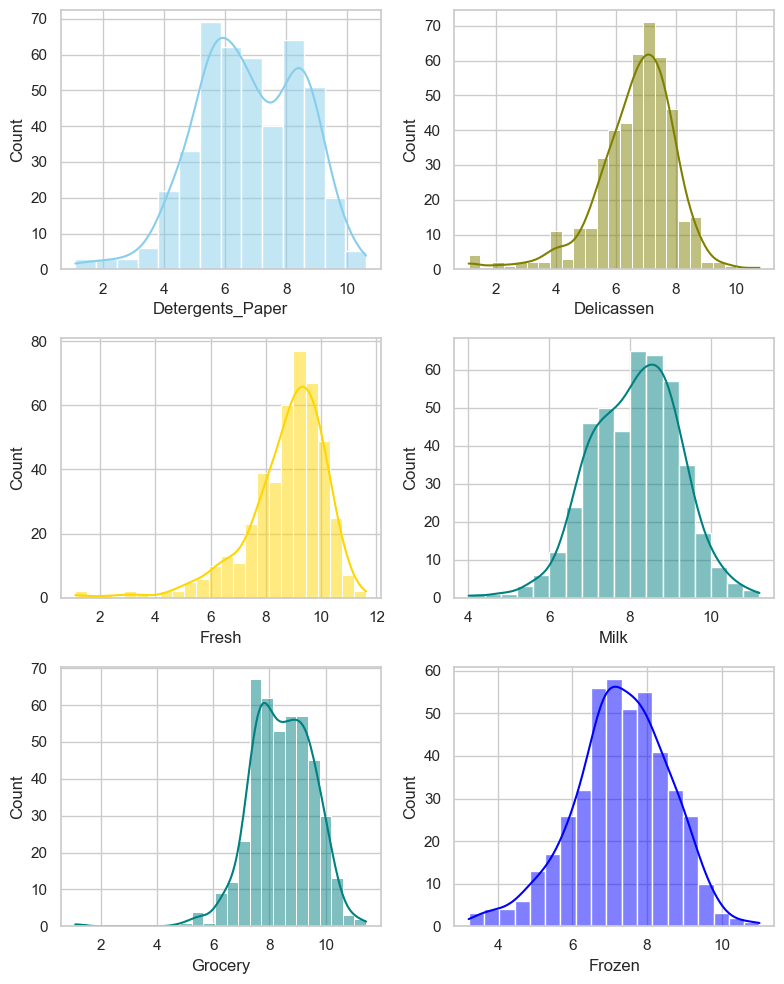

In [22]:
# QA - check how distributions changed after applying log. 
# data appears more normally distributed now

sns.set(style="whitegrid")
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=data_log, x="Detergents_Paper", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=data_log, x="Delicassen", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=data_log, x="Fresh", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=data_log, x="Milk", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=data_log, x="Grocery", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=data_log, x="Frozen", kde=True, color="blue", ax=axs[2, 1])

fig.tight_layout()

#### Scale Numeric Features (0 - 100)

Chose to scale between 0 - 100 range due to risk of categorical values would overpower clustering. 

In [23]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit and transform the selected columns
data_scaled = scaler.fit_transform(data_log)

# Display the scaled DataFrame
data_scaled = pd.DataFrame(data_scaled, columns = num_col_list)
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,79.288723,71.800933,75.750683,27.535386,71.363429,63.025320
1,73.731323,72.020764,78.027617,54.572267,73.550999,65.951068
2,72.733194,70.523867,75.906754,58.561959,74.239396,81.297296
3,79.725336,42.783294,70.112707,71.121881,53.894058,66.020641
4,84.792151,63.752084,75.274829,64.810872,67.070216,77.020279
...,...,...,...,...,...,...
435,87.381523,74.879260,83.016803,80.334425,43.130747,68.181740
436,90.023208,45.275637,53.581150,66.625299,36.077029,68.826816
437,80.591091,78.365354,89.158277,36.691496,89.368583,66.467324
438,77.313362,49.794152,63.950109,47.786160,42.289829,67.804620


#### One hot encode categorical features (region, channel)

In [24]:
data.loc[data['Region'] == 2, ['Channel', 'Region']]

,Channel,Region
293,2,2
294,1,2
295,2,2
296,1,2
297,2,2
298,2,2
299,1,2
300,2,2
301,2,2
302,2,2


## 8. Feature Selection: 
Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

Note:
* Feature selection not required here givent the relatively low number of features

In [40]:
enc = OneHotEncoder(handle_unknown='ignore')

In [41]:
cat_feats = data[['Region', 'Channel']]
data_encoded = pd.DataFrame(enc.fit_transform(cat_feats).to_array())

AttributeError: 'csr_matrix' object has no attribute 'to_array'

In [46]:
col_names = enc.get_feature_names_out().tolist()
col_names


['Region_1', 'Region_2', 'Region_3', 'Channel_1', 'Channel_2']

In [48]:
data_encoded = pd.DataFrame(enc.fit_transform(data[['Region', 'Channel']]).toarray(), columns = col_names)

In [25]:
# PCA not possible? not normally distributed? log num features? 


In [49]:
data_encoded

,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...
435,0.0,0.0,1.0,1.0,0.0
436,0.0,0.0,1.0,1.0,0.0
437,0.0,0.0,1.0,0.0,1.0
438,0.0,0.0,1.0,1.0,0.0


In [51]:
data_clean = pd.concat([data_encoded, data_scaled], axis = 1)
data_clean

,Region_1,Region_2,Region_3,Channel_1,Channel_2,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,0.0,1.0,0.0,1.0,79.288723,71.800933,75.750683,27.535386,71.363429,63.025320
1,0.0,0.0,1.0,0.0,1.0,73.731323,72.020764,78.027617,54.572267,73.550999,65.951068
2,0.0,0.0,1.0,0.0,1.0,72.733194,70.523867,75.906754,58.561959,74.239396,81.297296
3,0.0,0.0,1.0,1.0,0.0,79.725336,42.783294,70.112707,71.121881,53.894058,66.020641
4,0.0,0.0,1.0,0.0,1.0,84.792151,63.752084,75.274829,64.810872,67.070216,77.020279
...,...,...,...,...,...,...,...,...,...,...,...
435,0.0,0.0,1.0,1.0,0.0,87.381523,74.879260,83.016803,80.334425,43.130747,68.181740
436,0.0,0.0,1.0,1.0,0.0,90.023208,45.275637,53.581150,66.625299,36.077029,68.826816
437,0.0,0.0,1.0,0.0,1.0,80.591091,78.365354,89.158277,36.691496,89.368583,66.467324
438,0.0,0.0,1.0,1.0,0.0,77.313362,49.794152,63.950109,47.786160,42.289829,67.804620


In [80]:
#pca only on numeric features - 2 components 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

dfx_pca = pca.fit_transform(data_scaled)

In [81]:
dfx_pca

array([[-2.27645098e+01,  8.20386398e+00],
       [-2.08654826e+01, -9.67666423e+00],
       [-2.13122253e+01, -1.85317007e+01],
       [ 1.55015333e+01, -1.76099209e+01],
       [-9.06671770e+00, -2.54790191e+01],
       [-1.46910015e+01, -3.58841716e-01],
       [-1.20929237e+01,  8.48722932e+00],
       [-1.65080057e+01, -9.26177542e+00],
       [-9.82674027e+00,  1.12371571e+01],
       [-3.18788709e+01, -6.71865375e+00],
       [-2.04734183e+01, -1.29149870e+01],
       [ 1.30893691e+01,  2.21521983e+00],
       [-2.83071034e+01, -3.45473585e+00],
       [-1.99861356e+01, -1.39617632e+01],
       [-2.82000335e+01, -3.66345246e-01],
       [ 6.30037230e+00,  1.58538097e+01],
       [-3.16325672e+01,  2.53233254e+01],
       [-5.24117072e-01, -4.10591286e+00],
       [-1.57479054e+01, -1.77556456e+01],
       [-9.34760175e+00,  8.56959642e+00],
       [-1.01617776e+01, -7.59528332e+00],
       [ 2.19160607e+01, -1.01884087e+00],
       [ 1.17344921e+00, -3.09391664e+01],
       [-3.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [78]:
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,79.288723,71.800933,75.750683,27.535386,71.363429,63.025320
1,73.731323,72.020764,78.027617,54.572267,73.550999,65.951068
2,72.733194,70.523867,75.906754,58.561959,74.239396,81.297296
3,79.725336,42.783294,70.112707,71.121881,53.894058,66.020641
4,84.792151,63.752084,75.274829,64.810872,67.070216,77.020279
...,...,...,...,...,...,...
435,87.381523,74.879260,83.016803,80.334425,43.130747,68.181740
436,90.023208,45.275637,53.581150,66.625299,36.077029,68.826816
437,80.591091,78.365354,89.158277,36.691496,89.368583,66.467324
438,77.313362,49.794152,63.950109,47.786160,42.289829,67.804620


In [67]:
# preprocess the data
X = data_scaled

In [68]:
# Fit the model

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init='auto', # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit(dfx_pca)

<AxesSubplot: >

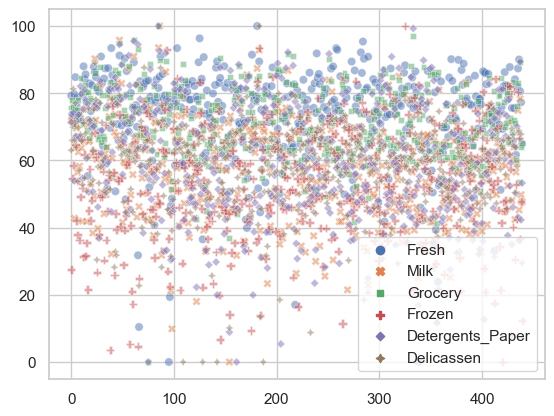

In [71]:
sns.scatterplot(data = X, alpha = 0.5)

In [82]:
# determine optimal number of clusters - elbow method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(dfx_pca)
    inertias.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method')

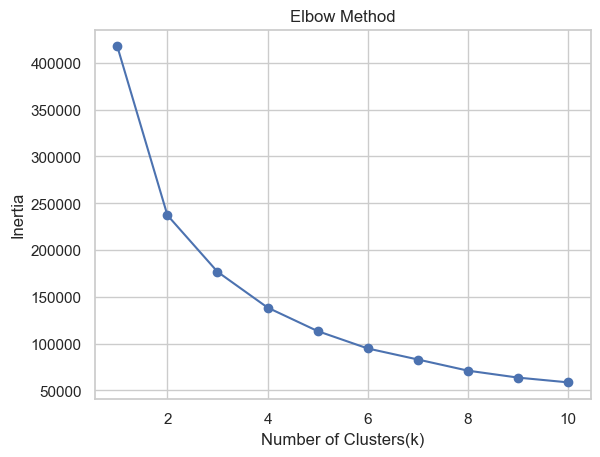

In [83]:
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [86]:
# use 4 clusters 
kmeans = KMeans(n_clusters = 4, random_state = 42)
# assign data points to clusters, update the centroids, and repeat until convergence."
kmeans.fit(dfx_pca)
cluster = kmeans.predict(dfx_pca)

In [87]:
cluster

array([1, 0, 0, 3, 3, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3, 0, 1, 0, 2,
       3, 0, 0, 1, 2, 2, 0, 3, 0, 3, 2, 3, 2, 1, 3, 0, 1, 3, 3, 3, 1, 1,
       1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 3, 0, 0, 1, 2, 1, 1, 0, 0, 0, 3, 1,
       1, 0, 3, 2, 3, 3, 3, 3, 0, 2, 3, 0, 2, 1, 2, 1, 0, 3, 1, 0, 0, 3,
       2, 3, 2, 3, 0, 3, 1, 1, 1, 2, 2, 3, 0, 0, 0, 3, 3, 2, 1, 0, 1, 1,
       3, 0, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 3, 3, 2,
       2, 2, 2, 2, 0, 1, 2, 3, 3, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2, 2, 2, 3,
       2, 1, 0, 3, 0, 1, 0, 2, 3, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       3, 3, 3, 3, 0, 0, 1, 3, 1, 2, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 0,
       3, 2, 0, 0, 3, 2, 2, 0, 2, 0, 0, 0, 3, 0, 2, 0, 0, 0, 1, 3, 1, 2,
       2, 1, 2, 3, 2, 3, 0, 2, 2, 3, 3, 0, 2, 2, 3, 1, 2, 3, 2, 3, 3, 3,
       3, 0, 0, 1, 3, 2, 3, 3, 2, 0, 3, 0, 0, 2, 2, 3, 3, 3, 1, 2, 2, 3,
       1, 0, 0, 3, 0, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 0, 2, 0, 3, 3, 3, 2,
       2, 3, 2, 2, 1, 3, 3, 0, 3, 1, 3, 0, 0, 2, 0,

<AxesSubplot: >

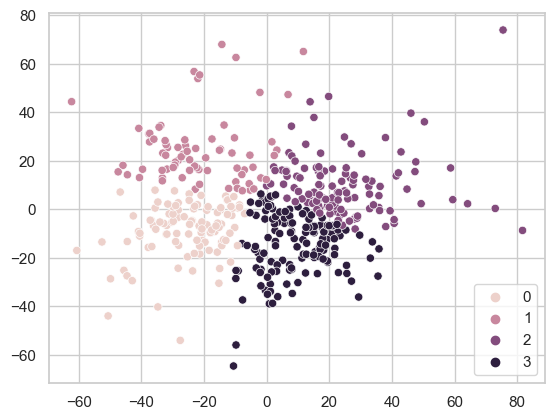

In [88]:
sns.scatterplot(x=dfx_pca[:,0], y=dfx_pca[:,1], hue=cluster)

In [ ]:
# initialize centroids

In [85]:



cluster_asst = kmeans.labels_

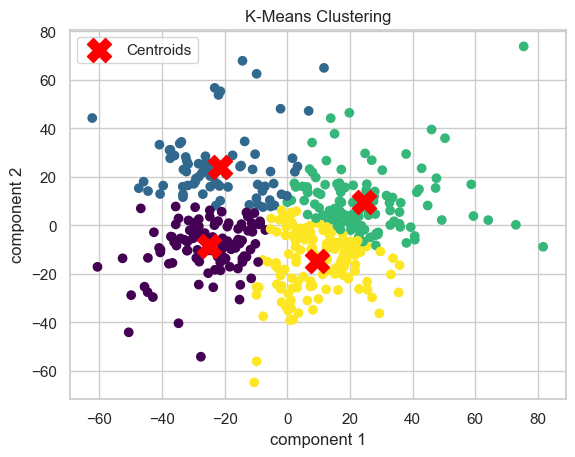

In [91]:

plt.scatter(x=dfx_pca[:,0], y=dfx_pca[:,1], c=cluster, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [94]:
# importance of each feature into 

pd.DataFrame(data=pca.components_, columns=data_scaled.columns.tolist())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.125055,-0.525847,-0.395860,0.206138,-0.697397,-0.149285
1,-0.498532,-0.208102,-0.052083,-0.707554,-0.015239,-0.452306




pca makes first component most important 

<AxesSubplot: xlabel='Detergents_Paper'>

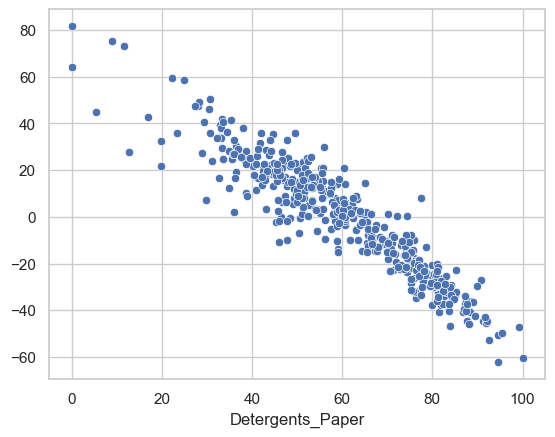

In [95]:
sns.scatterplot(x=data_clean['Detergents_Paper'], y=dfx_pca[:,0])

In [99]:
# add cluster to df 
data_clean['cluster'] = cluster
data_clean.groupby('cluster').mean()

,Region_1,Region_2,Region_3,Channel_1,Channel_2,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,,,,
0,0.196262,0.102804,0.700935,0.168224,0.831776,74.298323,71.698978,81.047562,53.244110,78.032942,64.715740
1,0.094595,0.108108,0.797297,0.391892,0.608108,57.829734,63.961881,78.300452,30.938054,74.202933,49.018608
2,0.210084,0.075630,0.714286,0.991597,0.008403,71.095966,42.109646,60.882461,49.586010,42.065378,50.336458
3,0.171429,0.135714,0.692857,0.950000,0.050000,80.025956,55.224621,68.110551,65.352904,53.171242,62.589817


In [104]:
data['cluster'] = cluster
cluster_analysis = data.groupby('cluster').mean()
cluster_analysis

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.831776,2.504673,11671.635514,12212.560748,15773.906542,2144.196262,6741.887850,2199.719626
1,1.608108,2.702703,3931.148649,6633.229730,12740.297297,486.351351,5588.121622,809.135135
2,1.008403,2.504202,9266.647059,1586.008403,2160.369748,1810.176471,306.310924,622.394958
3,1.050000,2.521429,18840.214286,4028.707143,4363.485714,6220.142857,689.307143,2154.514286


In [108]:
ranks = cluster_analysis.rank(ascending=False)
ranks

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0
1,2.0,1.0,4.0,2.0,2.0,4.0,2.0,3.0
2,4.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0
3,3.0,2.0,1.0,3.0,3.0,1.0,3.0,2.0


how are clusters represented in different each region
recommendation
Busineses Problem:
* which product categories to (not) encourage to which clients?
* client profile based on cluster
    * client cluster 3 purchases the most fresh, and the least milk, and low amount of Detergent.
    * CC 2 - lowest purchaser in all categories, except ranked 3rd in Frozen
    * CC -0 top purchaser in Milk, Grocery, Detergents, Delicassen, second largest Purchaser of Frozen and fresh
    * CC 1  - middle/back of the pack purchaser



# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [110]:
# import libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()


In [111]:
X=dfx_pca[:,0], y_res=dfx_pca[:,1]
plot_clusters(X,y_res, plt_cluster_centers = False)

ValueError: too many values to unpack (expected 2)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.